In [2]:
import pandas as pd
import os

In [3]:
def calculate_values(df,subject,method,order):
    # データ範囲を取得
    data = df.values
    # 結果を出力する
    results=[]
    place_value=0
    row_count=0
    place_values=[[0.25,-0.1,0],[0.25,0.1,0],[0.5,-0.1,0],[0.5,0.1,0],[0.25,-0.1,-0.1],[0.25,0.1,-0.1],[0.5,-0.1,-0.1],[0.5,0.1,-0.1]]

    # print(data)
    for i in range(len(data)):
        if isinstance(data[i][0],str) and data[i][0].startswith("place index:"):
            place_text,place_value=data[i][0].split(":")
            place_value=int(place_value)
            row_count=0
        else:
            results.append([
                subject,
                order,
                row_count,
                method,
                place_value,
                abs(float(data[i][0])-place_values[place_value][0]),
               abs(float(data[i][1])-place_values[place_value][1]),
              abs(float(data[i][2])-place_values[place_value][2]),
                ])
            row_count+=1
    return results
            
    
    
    

In [4]:
def calculate_values_averages(df,subject,method,order):
    # データ範囲を取得
    data = df.values
    # 結果を出力する
    results=[]
    place_value=0
    row_count=0
    sum1, sum2, sum3 = 0, 0, 0
    tmp_rows = 0
    place_values=[[0.25,-0.1,0],[0.25,0.1,0],[0.5,-0.1,0],[0.5,0.1,0],[0.25,-0.1,-0.1],[0.25,0.1,-0.1],[0.5,-0.1,-0.1],[0.5,0.1,-0.1]]

    # print(data)
    for i in range(len(data)):
        if isinstance(data[i][0],str) and data[i][0].startswith("place index:"):
           
            if tmp_rows > 0:
                # 平均値を計算して結果リストに追加
                results.append([
                     subject,
                    order,
                    row_count,
                    method,
                    place_value,
                    abs(sum1 / tmp_rows-place_values[place_value][0]),
                    abs(sum2 / tmp_rows-place_values[place_value][1]),
                    abs(sum3 / tmp_rows-place_values[place_value][2]),
                ])
                row_count+=1
            # 次のブロックのために変数をリセット
            place_text,place_value=data[i][0].split(":")
            place_value=int(place_value)
            # row_count=0
            sum1, sum2, sum3 = 0, 0, 0
            tmp_rows = 0
        else:
             # 各列の値を加算
            sum1 += float(data[i][0])
            sum2 += float(data[i][1])
            sum3 += float(data[i][2])
            tmp_rows += 1
    # 最後のブロックの平均値を計算して追加（ファイルの最後に count: がない場合）
    if tmp_rows > 0:
        results.append([
            subject,
            order,
            row_count,
            method,
            place_value,
            abs( sum1 / tmp_rows-place_values[place_value][0]), 
            abs(sum2 / tmp_rows-place_values[place_value][1]), 
            abs(sum3 / tmp_rows-place_values[place_value][2])    
        ])
      
    return results
            
    
    
    

In [5]:
import numpy as np

def calculate_values_median(df, subject, method, order):
    # データ範囲を取得
    data = df.values
    # 結果を出力する
    results = []
    place_value = 0
    row_count = 0
    place_values = [[0.25, -0.1, 0], [0.25, 0.1, 0], [0.5, -0.1, 0], [0.5, 0.1, 0], [0.25, -0.1, -0.1], [0.25, 0.1, -0.1], [0.5, -0.1, -0.1], [0.5, 0.1, -0.1]]

    values1, values2, values3 = [], [], []

    for i in range(len(data)):
        if isinstance(data[i][0], str) and data[i][0].startswith("place index:"):
            if values1:
                # 中央値を計算して結果リストに追加
                results.append([
                    subject,
                    order,
                    row_count,
                    method,
                    place_value,
                    abs(np.median(values1) - place_values[place_value][0]),
                    abs(np.median(values2) - place_values[place_value][1]),
                    abs(np.median(values3) - place_values[place_value][2]),
                ])
                row_count += 1
            # 次のブロックのために変数をリセット
            place_text, place_value = data[i][0].split(":")
            place_value = int(place_value)
            row_count = 0
            values1, values2, values3 = [], [], []
        else:
            # 各列の値をリストに追加
            values1.append(float(data[i][0]))
            values2.append(float(data[i][1]))
            values3.append(float(data[i][2]))
            row_count += 1

    # 最後のブロックの中央値を計算して追加（ファイルの最後に count: がない場合）
    if values1:
        results.append([
            subject,
            order,
            row_count,
            method,
            place_value,
            abs(np.median(values1) - place_values[place_value][0]),
            abs(np.median(values2) - place_values[place_value][1]),
            abs(np.median(values3) - place_values[place_value][2])
        ])

    return results


In [6]:

# .txtファイルからデータを読み込む
def read_txt_to_dataframe(file_path):
    # ファイルを読み込み、各行をリストに格納
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        lines = file.readlines()

    # 各行をカンマで分割してデータフレームに変換
    data = [line.strip().split(',') for line in lines]

    # データフレームに変換
    df = pd.DataFrame(data)
    return df

In [7]:
import pathlib
import datetime
# 全てのフォルダを処理し、結果を統合
all_results = []
def calculate_all_folders(files_paths,subject_name,sorted_indices):
    for i, file_path in enumerate(files_paths):
            method=i-1
          
            order=sorted_indices.index(i-1)
            df = read_txt_to_dataframe(file_path)
            # all_results.extend(calculate_values_averages(df,subject_name, method,order))
            # all_results.extend(calculate_values(df,subject_name, method,order))
            
            all_results.extend(calculate_values_median(df,subject_name, method,order))

In [8]:
import os
from datetime import datetime

# ファイルの作成日時を取得する関数
def get_creation_time(file_name):
    return os.path.getctime(file_name)


In [9]:

subject_names=["朴さん","水上","佐々木","歩さん","万くん","竹村君","平岡拓海","吉村厚紀","岡本","菊池たくま","伊藤吉彦","ほういしん","小谷健太朗","河合希俊","上園千鶴さん"]

# subject_names=["上園千鶴さん"]

for i in range(len(subject_names)):
        root_path = r"C:\Users\takaharayota\Research\Exp1-data\{}\values".format(subject_names[i])
        files_paths = [
                root_path + r"\音無し.txt",
        
        root_path + r"\離散指数.txt",
        root_path + r"\連続指数.txt",
        root_path + r"\連続線形.txt",
                root_path + r"\離散線形.txt",
        
        ]
        # ファイル名と元のインデックスのタプルのリストを作成
        indexed_files = list(enumerate(files_paths))
        # 作成日時順に並べ替える
        sorted_indexed_files = sorted(indexed_files, key=lambda x: get_creation_time(x[1]))
        # 並べ替え後のインデックスを抽出
        sorted_indices = [index-1 for index, file in sorted_indexed_files]
        calculate_all_folders(files_paths,subject_names[i],sorted_indices)


    
print(all_results)  



# 統合されたデータをデータフレームに変換
columns = ['Subject','Order','Count','Method', 'Place', 'X', 'Y', 'Z']
df_all = pd.DataFrame(all_results, columns=columns)

# データの表示
# DataFrameを.txtファイルに出力
df_all.to_csv('output-ave.txt', sep='\t', index=False)

print("DataFrameの内容がoutput-ave.txtに出力されました。")


[['朴さん', 0, 5, -1, 0, np.float64(0.06061349999999999), np.float64(0.014729499999999993), np.float64(0.0063859)], ['朴さん', 0, 5, -1, 1, np.float64(0.057944300000000004), np.float64(0.08498319999999998), np.float64(0.06695749)], ['朴さん', 0, 5, -1, 2, np.float64(0.14847520000000003), np.float64(0.049246290000000005), np.float64(0.03603477)], ['朴さん', 0, 5, -1, 3, np.float64(0.04668220000000001), np.float64(0.001159230000000011), np.float64(0.06860604)], ['朴さん', 4, 5, 0, 3, np.float64(0.01721339999999999), np.float64(0.004748599999999992), np.float64(0.01640683)], ['朴さん', 4, 5, 0, 1, np.float64(0.002819199999999994), np.float64(0.006314120000000006), np.float64(0.005077489)], ['朴さん', 4, 5, 0, 2, np.float64(0.0020210000000000505), np.float64(0.0029991000000000045), np.float64(0.01466771)], ['朴さん', 4, 5, 0, 0, np.float64(0.0038787000000000127), np.float64(0.0033079000000000025), np.float64(0.003772907)], ['朴さん', 1, 5, 1, 0, np.float64(0.003540600000000005), np.float64(0.0034806999999999894), np

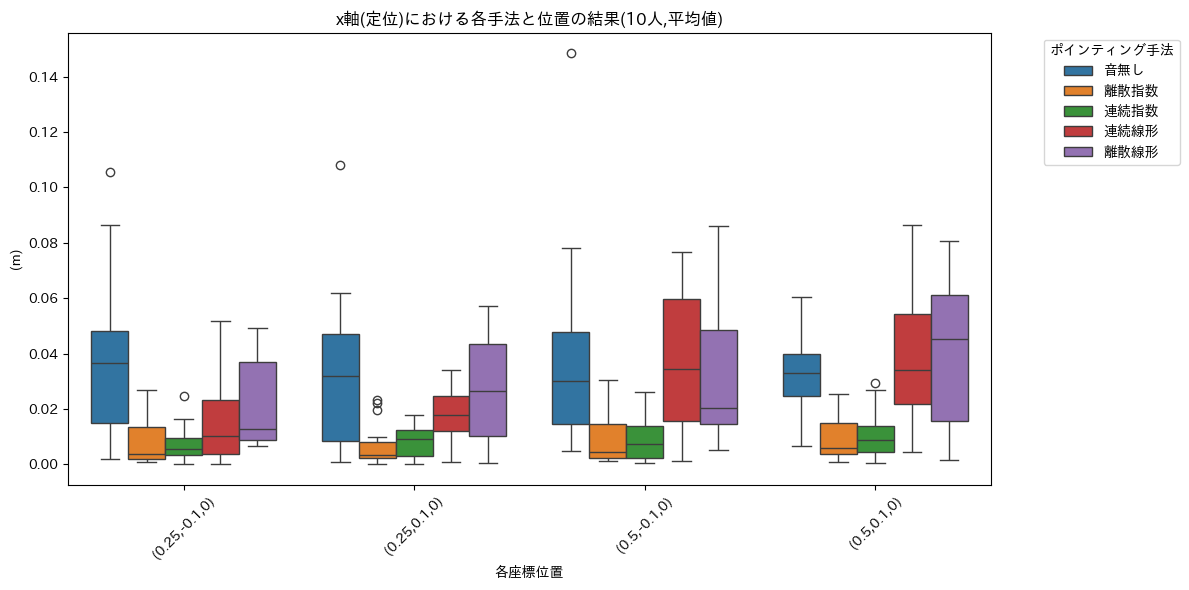

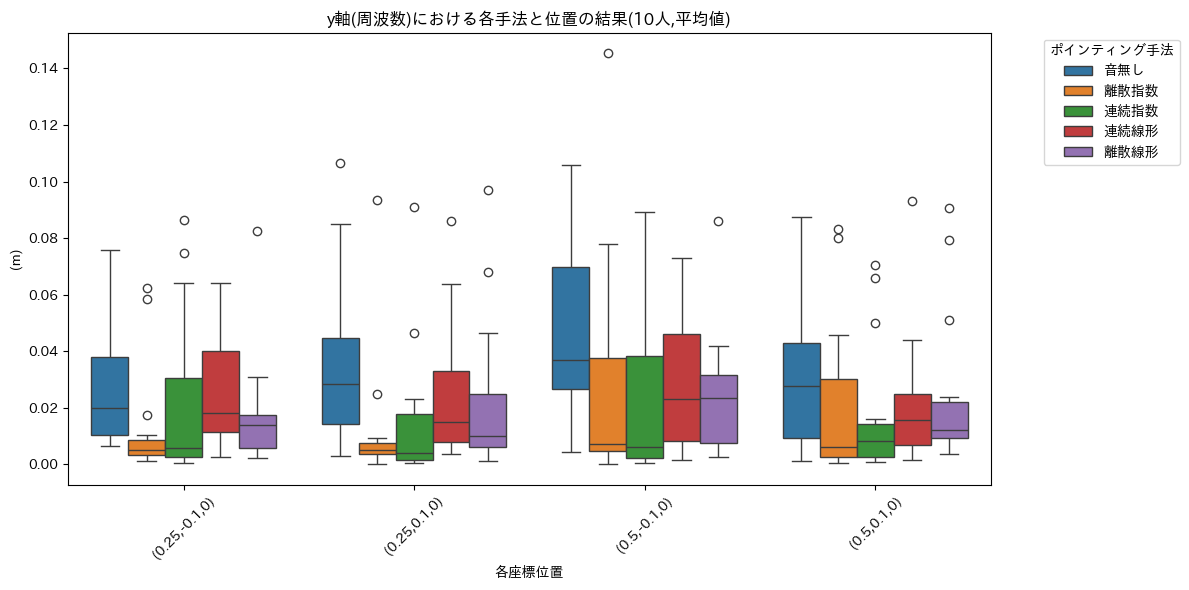

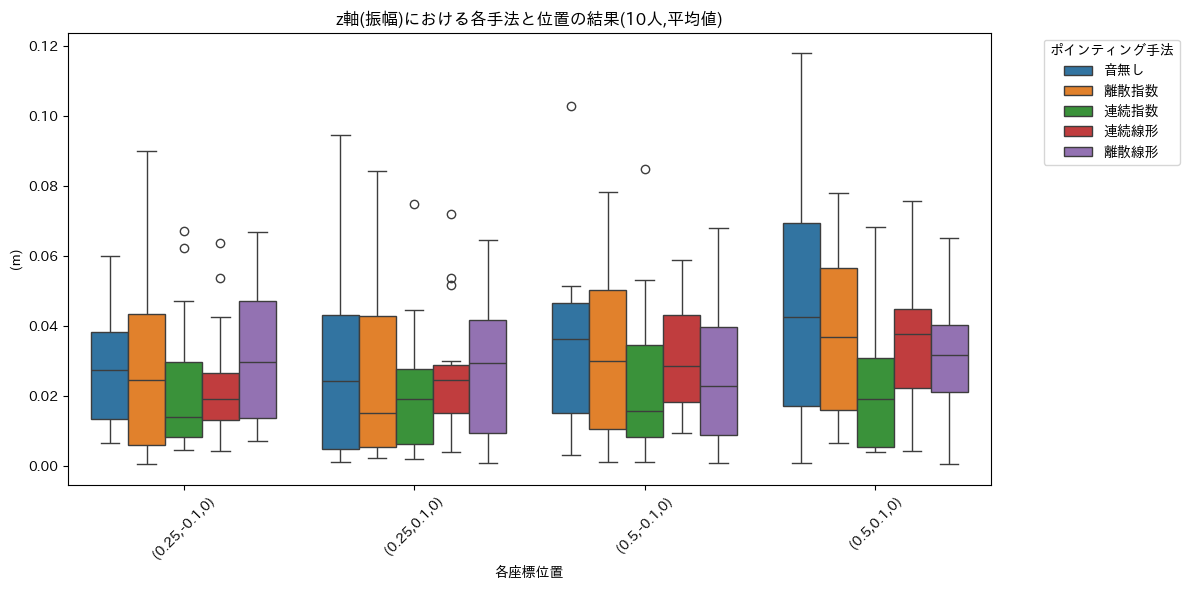

In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# データフレームの例
# df_all = pd.DataFrame(...)

# Method と Place の具体的な意味をラベルに追加する
method_labels = {
    -1: '音無し',
    0: '離散指数',
    1: '連続指数',
    2: '連続線形',
    3: '離散線形',


}

place_labels = {
    0: '(0.25,-0.1,0)',
    1: '(0.25,0.1,0)',
    2: '(0.5,-0.1,0)',
    3: '(0.5,0.1,0)',
    4: '(0.25,-0.1,-0.1)',
    5: '(0.25,0.1,-0.1)',
    6: '(0.5,-0.1,-0.1)',
    7: '(0.5,0.1,-0.1)'
}

# Method と Place のラベルをデータフレームに追加
df_all['Method_Label'] = df_all['Method'].map(method_labels)
df_all['Place_Label'] = df_all['Place'].map(place_labels)

# 可視化
plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='X', hue='Method_Label', data=df_all)
plt.title('x軸(定位)における各手法と位置の結果(10人,平均値)')
plt.xlabel('各座標位置')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='Y', hue='Method_Label', data=df_all)
plt.title('y軸(周波数)における各手法と位置の結果(10人,平均値)')
plt.xlabel('各座標位置')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='Z', hue='Method_Label', data=df_all)
plt.title('z軸(振幅)における各手法と位置の結果(10人,平均値)')
plt.xlabel('各座標位置')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\takaharayota\AppData\Local\Temp\ipykernel_17712\3538364167.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mean = df_all.groupby(['Place_Label', 'Method_Label'])[['X', 'Y', 'Z']].mean().reset_index()


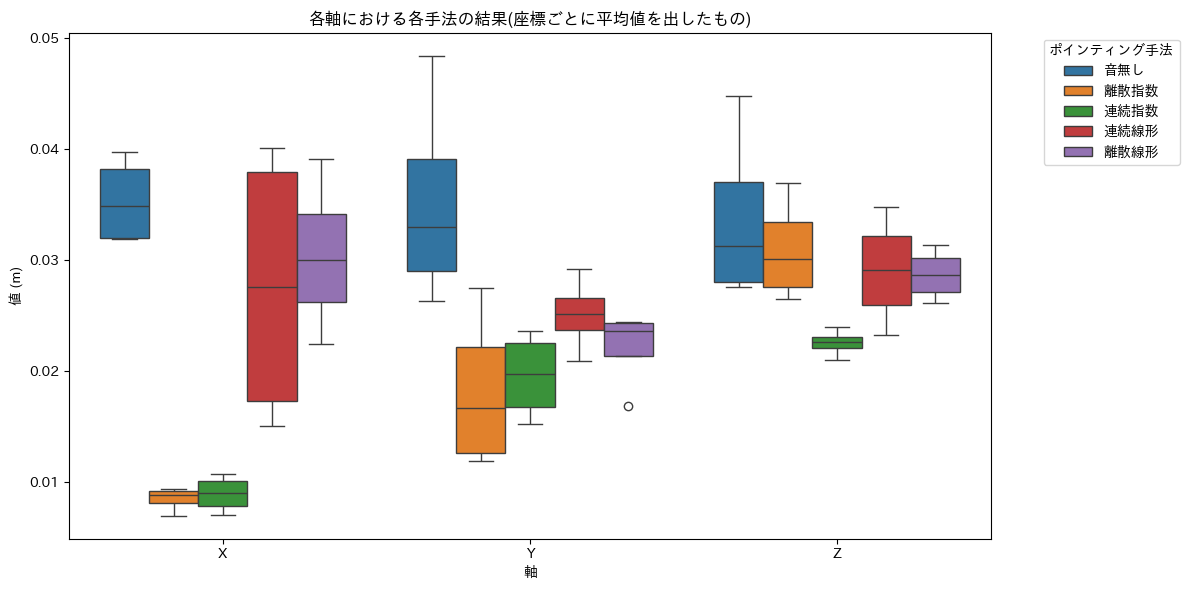

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# df_all データフレームがあると仮定

# Method と Place の具体的な意味をラベルに追加する
method_labels = {
    -1: '音無し',
    0: '離散指数',
    1: '連続指数',
    2: '連続線形',
    3: '離散線形',
}

place_labels = {
    0: '(0.25,-0.1,0)',
    1: '(0.25,0.1,0)',
    2: '(0.5,-0.1,0)',
    3: '(0.5,0.1,0)',
    4: '(0.25,-0.1,-0.1)',
    5: '(0.25,0.1,-0.1)',
    6: '(0.5,-0.1,-0.1)',
    7: '(0.5,0.1,-0.1)'
}

# Method と Place のラベルをデータフレームに追加
df_all['Method_Label'] = df_all['Method'].map(method_labels)
df_all['Place_Label'] = df_all['Place'].map(place_labels)

# Method_Labelの順序を指定
method_order = ['音無し', '離散指数', '連続指数', '連続線形', '離散線形']
df_all['Method_Label'] = pd.Categorical(df_all['Method_Label'], categories=method_order, ordered=True)

# Place_Labelごとの平均値を計算
df_mean = df_all.groupby(['Place_Label', 'Method_Label'])[['X', 'Y', 'Z']].mean().reset_index()

# 長い形式に変換
df_melted = df_mean.melt(id_vars=['Place_Label', 'Method_Label'], value_vars=['X', 'Y', 'Z'], var_name='Axis', value_name='Value')

# 可視化
plt.figure(figsize=(12, 6))
sns.boxplot(x='Axis', y='Value', hue='Method_Label', data=df_melted)
plt.title('各軸における各手法の結果(座標ごとに平均値を出したもの)')
plt.xlabel('軸')
plt.ylabel('値 (m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\takaharayota\AppData\Local\Temp\ipykernel_17712\2359027595.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mean = df_all.groupby(['Place_Label', 'Method_Label'])[['X', 'Y', 'Z']].mean().reset_index()


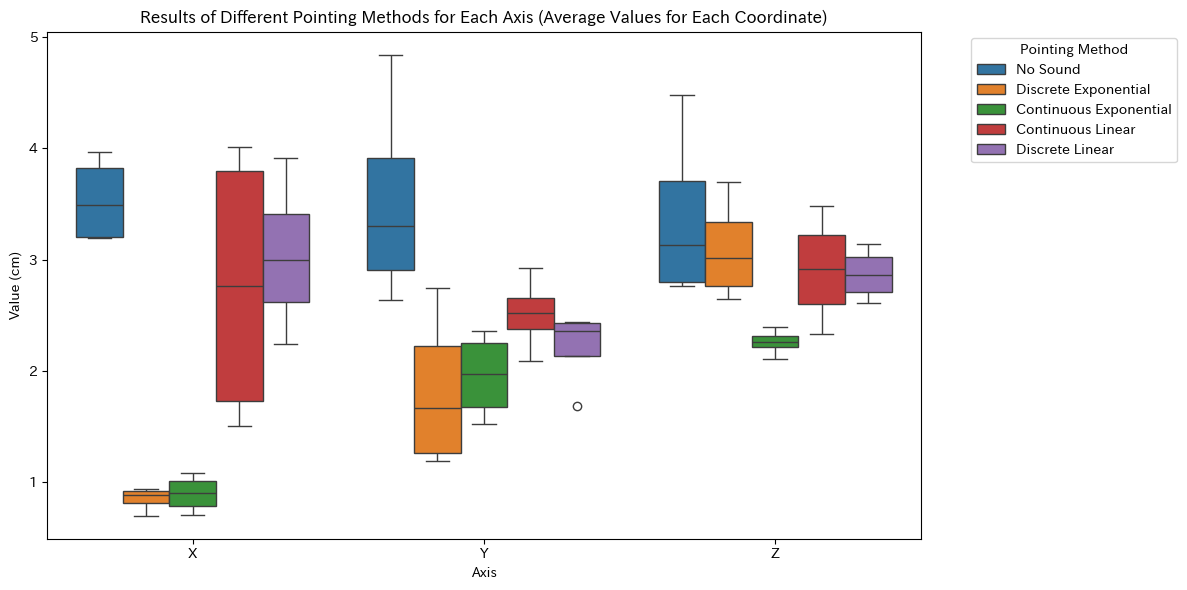

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# Assuming df_all is the existing DataFrame

# Adding descriptive labels for Method and Place
method_labels = {
    -1: 'No Sound',
    0: 'Discrete Exponential',
    1: 'Continuous Exponential',
    2: 'Continuous Linear',
    3: 'Discrete Linear',
}

place_labels = {
    0: '(0.25,-0.1,0)',
    1: '(0.25,0.1,0)',
    2: '(0.5,-0.1,0)',
    3: '(0.5,0.1,0)',
    4: '(0.25,-0.1,-0.1)',
    5: '(0.25,0.1,-0.1)',
    6: '(0.5,-0.1,-0.1)',
    7: '(0.5,0.1,-0.1)'
}

# Adding labels to the DataFrame
df_all['Method_Label'] = df_all['Method'].map(method_labels)
df_all['Place_Label'] = df_all['Place'].map(place_labels)

# Specifying the order of Method_Label
method_order = ['No Sound', 'Discrete Exponential', 'Continuous Exponential', 'Continuous Linear', 'Discrete Linear']
df_all['Method_Label'] = pd.Categorical(df_all['Method_Label'], categories=method_order, ordered=True)

# Calculating the mean values per Place_Label and Method_Label
df_mean = df_all.groupby(['Place_Label', 'Method_Label'])[['X', 'Y', 'Z']].mean().reset_index()

# Convert meters to centimeters
df_mean[['X', 'Y', 'Z']] = df_mean[['X', 'Y', 'Z']] * 100

# Converting to long format
df_melted = df_mean.melt(id_vars=['Place_Label', 'Method_Label'], value_vars=['X', 'Y', 'Z'], var_name='Axis', value_name='Value')

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Axis', y='Value', hue='Method_Label', data=df_melted)
plt.title('Results of Different Pointing Methods for Each Axis (Average Values for Each Coordinate)')
plt.xlabel('Axis')
plt.ylabel('(cm)')
plt.legend(title='Pointing Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [15]:
import scipy.stats as stats

# 正規性の検定
results = []

for axis in ['X', 'Y', 'Z']:
    stat, p_value = stats.shapiro(df_all[axis])
    results.append({ 'Axis': axis, 'stat': stat, 'p_value': p_value})

# 結果をデータフレームに変換
df_results = pd.DataFrame(results)

# 正規性の検定結果をCSVファイルとして保存
output_file = 'shapiro_wilk_results.csv'
df_results.to_csv(output_file, index=False)

print(f"Shapiro-Wilk検定結果が {output_file} に保存されました。")

# 結果の一部を表示
df_results

Shapiro-Wilk検定結果が shapiro_wilk_results.csv に保存されました。


,Axis,stat,p_value
0,X,0.833284,2.643332e-17
1,Y,0.799021,5.780403e-19
2,Z,0.920230,1.467434e-11


In [ ]:
import scipy.stats as stats

# 正規性の検定
results = []
for method in df_all['Method_Label'].unique():
    for axis in ['X', 'Y', 'Z']:
        stat, p_value = stats.shapiro(df_all[df_all['Method_Label'] == method][axis])
        results.append({'Method_Label': method, 'Axis': axis, 'stat': stat, 'p_value': p_value})

# 結果をデータフレームに変換
df_results = pd.DataFrame(results)

# 正規性の検定結果をCSVファイルとして保存
output_file = 'shapiro_wilk_results.csv'
df_results.to_csv(output_file, index=False)

print(f"Shapiro-Wilk検定結果が {output_file} に保存されました。")

# 結果の一部を表示
df_results

Shapiro-Wilk検定結果が shapiro_wilk_results.csv に保存されました。


,Method_Label,Axis,stat,p_value
0,No Sound,X,0.870699,1.316456e-05
1,No Sound,Y,0.894298,8.204053e-05
2,No Sound,Z,0.910483,3.242162e-04
3,Discrete Exponential,X,0.824993,6.003966e-07
4,Discrete Exponential,Y,0.619576,3.307344e-11
5,Discrete Exponential,Z,0.896807,1.008285e-04
6,Continuous Exponential,X,0.893446,7.654020e-05
7,Continuous Exponential,Y,0.704919,1.104915e-09
8,Continuous Exponential,Z,0.847776,2.620676e-06
9,Continuous Linear,X,0.910096,3.133338e-04


In [ ]:
from itertools import combinations

# Wilcoxonの符号付順位検定
wilcoxon_results = []
methods = df_all['Method_Label'].unique()
for axis in ['X', 'Y', 'Z']:
    for method1, method2 in combinations(methods, 2):
        stat, p_value = stats.wilcoxon(df_all[df_all['Method_Label'] == method1][axis],
                                       df_all[df_all['Method_Label'] == method2][axis])
        wilcoxon_results.append({
            'Axis': axis,
            'Comparison': f'{method1} vs {method2}',
            'stat': stat,
            'p_value': p_value
        })

# 結果をデータフレームに変換
df_wilcoxon_results = pd.DataFrame(wilcoxon_results)

# Wilcoxonの符号付順位検定結果をCSVファイルとして保存
output_file_wilcoxon = 'wilcoxon_results.csv'
df_wilcoxon_results.to_csv(output_file_wilcoxon, index=False)

print(f"Wilcoxonの符号付順位検定結果が {output_file_wilcoxon} に保存されました。")

# 結果の一部を表示
df_wilcoxon_results


Wilcoxonの符号付順位検定結果が wilcoxon_results.csv に保存されました。


,Axis,Comparison,stat,p_value
0,X,No Sound vs Discrete Exponential,126.0,6.310856e-09
1,X,No Sound vs Continuous Exponential,108.0,2.836109e-09
2,X,No Sound vs Continuous Linear,699.0,1.118109e-01
3,X,No Sound vs Discrete Linear,793.0,3.691239e-01
4,X,Discrete Exponential vs Continuous Exponential,839.0,5.758329e-01
5,X,Discrete Exponential vs Continuous Linear,159.0,2.615939e-08
6,X,Discrete Exponential vs Discrete Linear,107.0,2.711482e-09
7,X,Continuous Exponential vs Continuous Linear,197.0,1.252722e-07
8,X,Continuous Exponential vs Discrete Linear,145.0,1.441083e-08
9,X,Continuous Linear vs Discrete Linear,767.0,2.759259e-01


In [16]:
from itertools import combinations
import numpy as np

# Wilcoxonの符号付順位検定
wilcoxon_results = []
methods = df_all['Method_Label'].unique()
num_comparisons = sum(1 for _ in combinations(methods, 2))

for axis in ['X', 'Y', 'Z']:
    for method1, method2 in combinations(methods, 2):
        stat, p_value = stats.wilcoxon(df_all[df_all['Method_Label'] == method1][axis],
                                       df_all[df_all['Method_Label'] == method2][axis])
        wilcoxon_results.append({
            'Axis': axis,
            'Comparison': f'{method1} vs {method2}',
            'stat': stat,
            'p_value': p_value
        })

# 結果をデータフレームに変換
df_wilcoxon_results = pd.DataFrame(wilcoxon_results)

# ボンフェローニ補正
df_wilcoxon_results['p_value_bonferroni'] = df_wilcoxon_results['p_value'] * num_comparisons
df_wilcoxon_results['p_value_bonferroni'] = df_wilcoxon_results['p_value_bonferroni'].apply(lambda x: min(x, 1.0))

# 有意性の判断
df_wilcoxon_results['significant'] = df_wilcoxon_results['p_value_bonferroni'] < 0.05

# ボンフェローニ補正結果をCSVファイルとして保存
output_file_bonferroni = 'wilcoxon_bonferroni_results.csv'
df_wilcoxon_results.to_csv(output_file_bonferroni, index=False)

print(f"Wilcoxonの符号付順位検定結果（ボンフェローニ補正適用）が {output_file_bonferroni} に保存されました。")

# 結果の一部を表示
df_wilcoxon_results


Wilcoxonの符号付順位検定結果（ボンフェローニ補正適用）が wilcoxon_bonferroni_results.csv に保存されました。


,Axis,Comparison,stat,p_value,p_value_bonferroni,significant
0,X,No Sound vs Discrete Exponential,126.0,6.310856e-09,6.310856e-08,True
1,X,No Sound vs Continuous Exponential,108.0,2.836109e-09,2.836109e-08,True
2,X,No Sound vs Continuous Linear,699.0,1.118109e-01,1.000000e+00,False
3,X,No Sound vs Discrete Linear,793.0,3.691239e-01,1.000000e+00,False
4,X,Discrete Exponential vs Continuous Exponential,839.0,5.758329e-01,1.000000e+00,False
5,X,Discrete Exponential vs Continuous Linear,159.0,2.615939e-08,2.615939e-07,True
6,X,Discrete Exponential vs Discrete Linear,107.0,2.711482e-09,2.711482e-08,True
7,X,Continuous Exponential vs Continuous Linear,197.0,1.252722e-07,1.252722e-06,True
8,X,Continuous Exponential vs Discrete Linear,145.0,1.441083e-08,1.441083e-07,True
9,X,Continuous Linear vs Discrete Linear,767.0,2.759259e-01,1.000000e+00,False


In [ ]:
# 各Method_LabelごとのX軸の中央値を確認
x_median = df_all.groupby('Method_Label')['X'].median().sort_values()
# 実際の数値を比較
x_median = df_all.groupby('Method_Label')['X'].median().sort_values()
print(x_median)


Method_Label
Discrete Exponential      0.004539
Continuous Exponential    0.007432
Continuous Linear         0.023542
Discrete Linear           0.025710
No Sound                  0.033957
Name: X, dtype: float64


C:\Users\takaharayota\AppData\Local\Temp\ipykernel_2128\728331895.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_median = df_all.groupby('Method_Label')['X'].median().sort_values()
C:\Users\takaharayota\AppData\Local\Temp\ipykernel_2128\728331895.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_median = df_all.groupby('Method_Label')['X'].median().sort_values()


C:\Users\takaharayota\AppData\Local\Temp\ipykernel_2128\652475116.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Subject', y='X', hue='Order', data=df_all, ci=None)


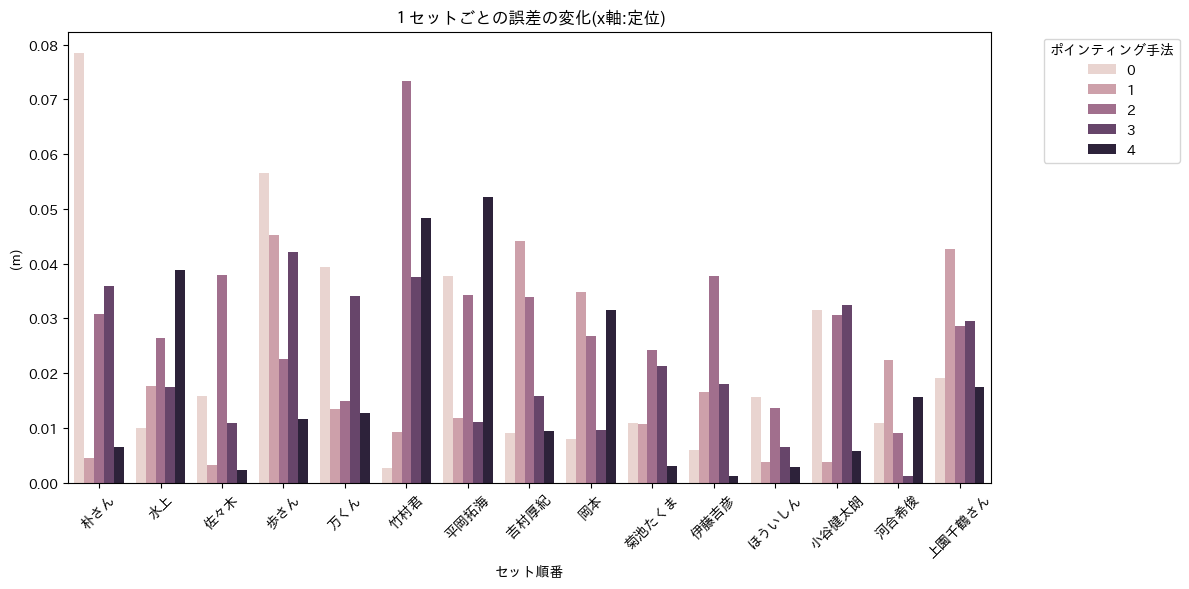

C:\Users\takaharayota\AppData\Local\Temp\ipykernel_2128\652475116.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Subject', y='Y', hue='Order', data=df_all, ci=None)


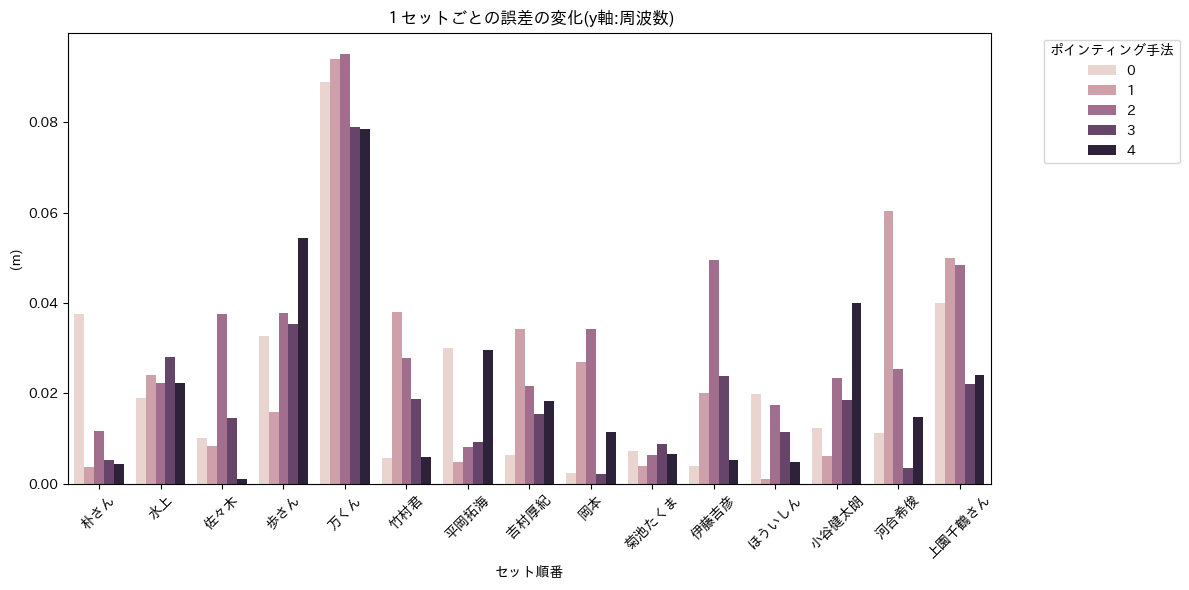

C:\Users\takaharayota\AppData\Local\Temp\ipykernel_2128\652475116.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Subject', y='Z', hue='Order', data=df_all, ci=None)


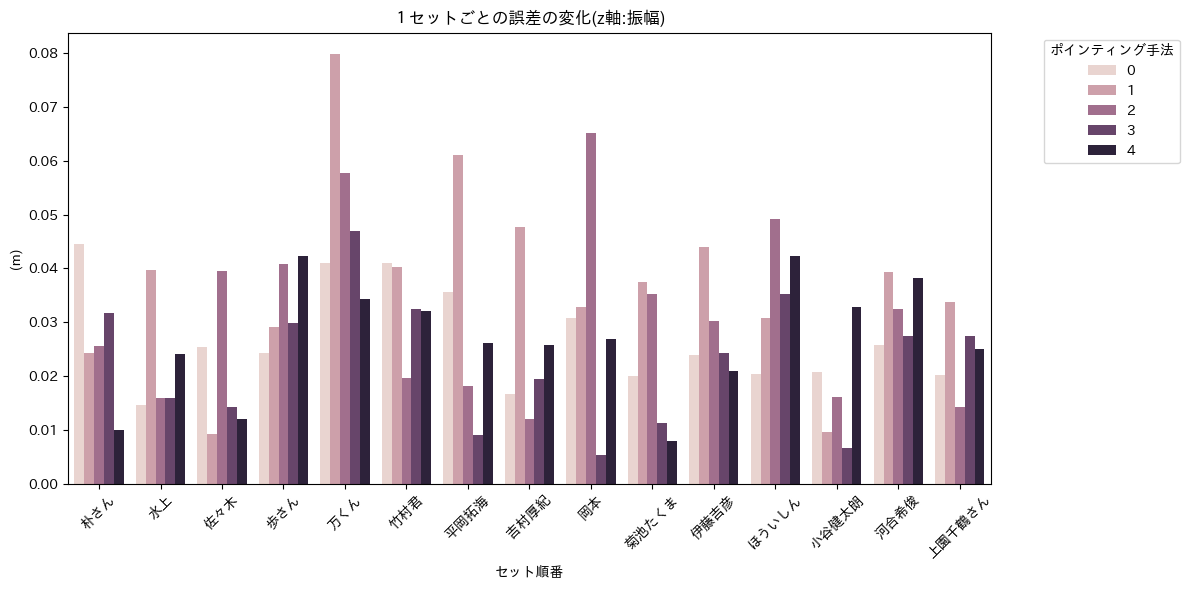

In [ ]:
# 可視化
plt.figure(figsize=(12, 6))
# Barplot
sns.barplot(x='Subject', y='X', hue='Order', data=df_all, ci=None)
plt.title('１セットごとの誤差の変化(x軸:定位)')
plt.xlabel('セット順番')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Subject', y='Y', hue='Order', data=df_all, ci=None)
plt.title('１セットごとの誤差の変化(y軸:周波数)')
plt.xlabel('セット順番')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Subject', y='Z', hue='Order', data=df_all, ci=None)
plt.title('１セットごとの誤差の変化(z軸:振幅)')
plt.xlabel('セット順番')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
